In [8]:
import PyPDF2
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pdf2image import convert_from_path
from IPython.display import display, Image as IPImage


In [2]:
# Replace 'your_pdf_file.pdf' with your PDF file name
pages = convert_from_path('202311723164.pdf', 500)
first_page = pages[0]

In [3]:
# Convert PIL Image to a format suitable for OCR
first_page_for_ocr = np.array(first_page)
text = pytesseract.image_to_string(first_page_for_ocr)
print(text)  # This will print the text detected by OCR

PAY THIS AMOUNT

PAGE:

1
N°
NOTES-NOTE

Soe ee
Sleleleleleleleleleleleleleleleleleiele)

OM MOANINADNPOALLALOLYONOM
OVO OVS'OV OV OV 0019 10 SOV SAI OY St OV OF St!
OT OO? Or FAONOMANONOMAaNO
OlMANVOUDOWODOADMNNOMNTOHHM
ANN ane AWAINAN oe

kKkKKKKKKKKEKE qe AMOUNT

TVQ-PST

RETOURNER CETTE COPIE AVEC VOTRE PAIEMENT
TPS-GST

RETURN THIS COPY WITH YOUR PAYMENT

OP MONIN ADDO ALO SAILOLNOOAIOM
OVO OVST'OV 0 000 19 10 SOV SCION SO) OV ST
Ost OOF Ol FtNOOM-ANOOOMaNO
OMmANUODOUWODOADNMNNOMN TOM
ANN An ANAINAN oe

N° RELEVE
STATEMENT NO.

737295

MONTANT - AMOUNT

AA

OM OAMLOWO OSD ADUOAINOOWO AHL
Prttidittt@tttttitttittl
ODOOFnMNOALOM™OAWAOTANMSALOM ©
MANMMAANOMMOODODOMODOMO
©0100 00 00 COP 09 00 COP P= PP Pe PP I
NILOLO EPO MUO MLO LO LO LO LO LO LO LO LOLOL
AIM St St PALQN LN OV ON 0) 0) 0) 0) 0) OV 0 OV OY
OMr-OOOnnnnAnAnAnAnAnnnnne
Prttid?tttd@itttittttittt
Slelelelelelelelelelelelelelelelelelele
LOLLY LY LO LNW WOW OWWOWWOW WWW WWO

MM
04/11/2023

N° FACTURE

DATE RELEVE
PROBILL NO.



In [4]:
# Get bounding box estimates
h, w, _ = first_page_for_ocr.shape
boxes = pytesseract.image_to_boxes(first_page_for_ocr)

# Draw boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    first_page_for_ocr = cv2.rectangle(first_page_for_ocr, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

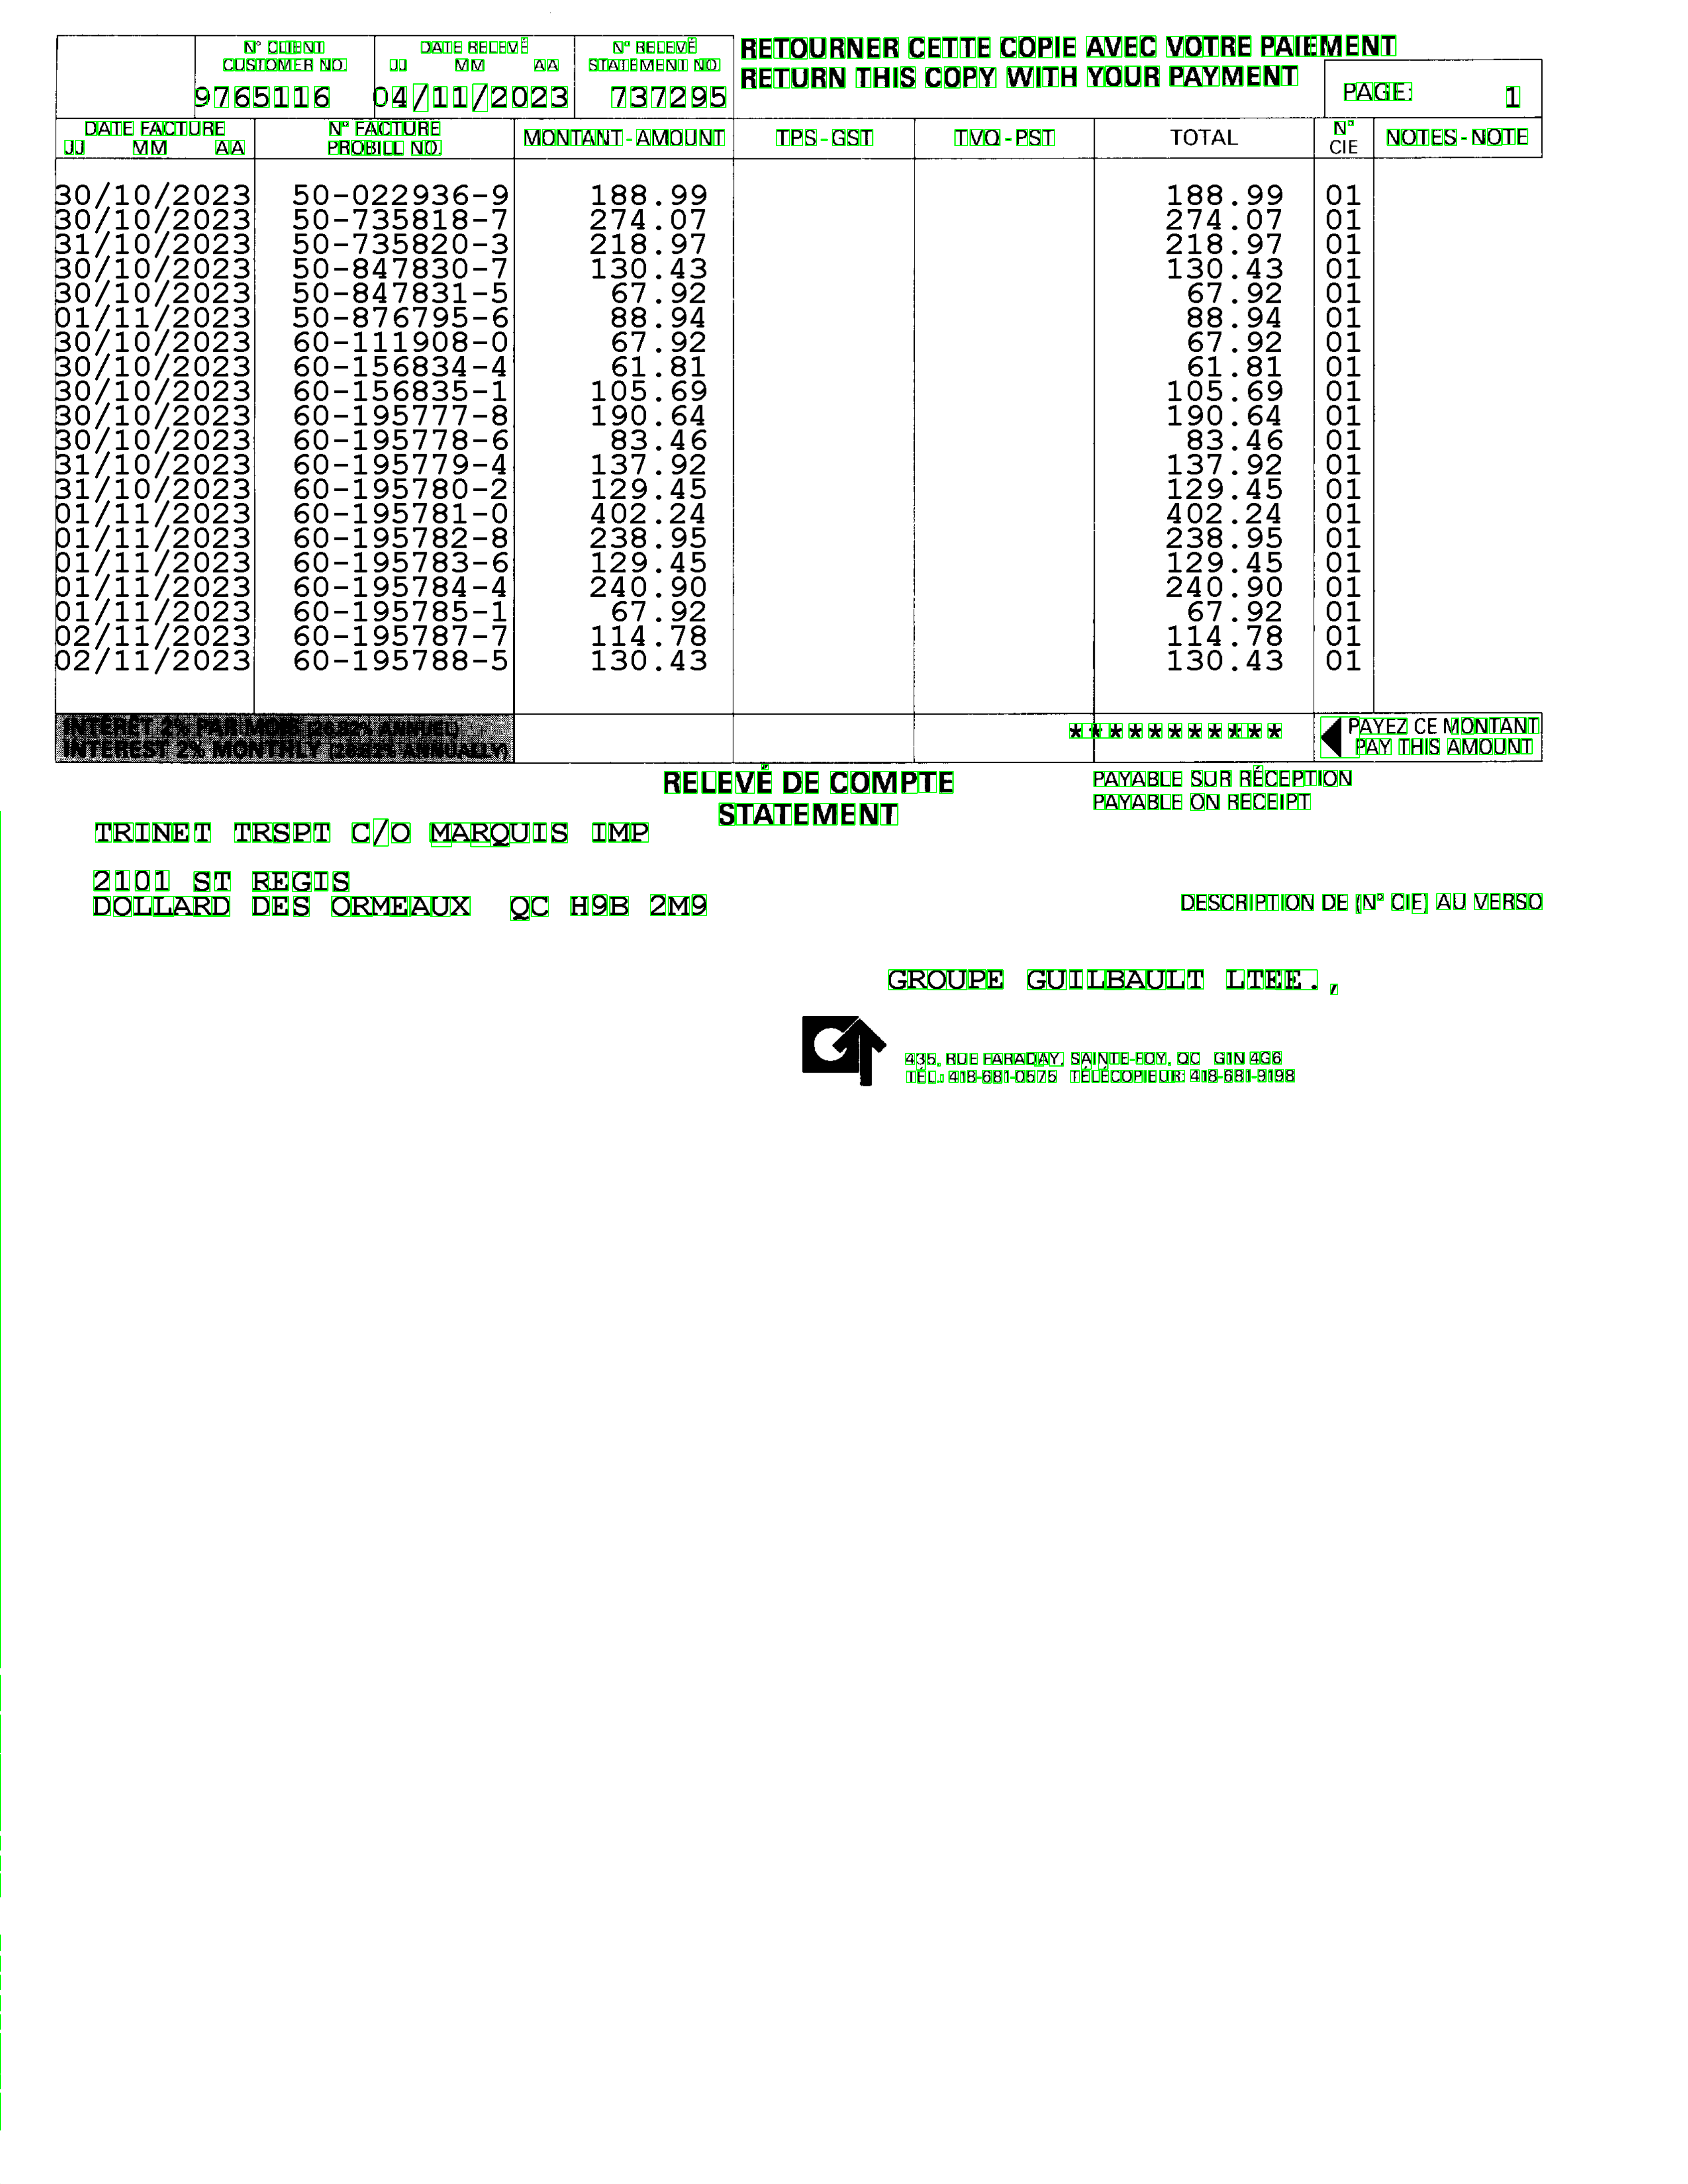

In [9]:
import io

# Save the OpenCV image (which is in NumPy array format) to a buffer
is_success, buffer = cv2.imencode(".png", first_page_for_ocr)
io_buf = io.BytesIO(buffer)

# Display the image from the buffer
display(IPImage(data=io_buf.getvalue(), format='png'))